In [1]:
# 1) Importing All Libraries

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import customtkinter as ctk
import tkinter as tk

In [2]:
# 2) Cleaning The Data

df = pd.read_csv("ball_by_ball_it20.csv")

# 2.1) Getting Only Required Columns
df = df[['Match ID', 'Bat First', 'Bat Second', 'Venue', 'Winner']]

# 2.2) Asuming Top 11 Teams
teams = ['West Indies', 'Sri Lanka', 'England', 'Bangladesh', 'India', 'New Zealand', 'Pakistan', 'Afghanistan', 'South Africa', 'Australia', 'Ireland']

# 2.3) Making All Possible Match Combinations
team_combinations = [(team1, team2) for team1 in teams for team2 in teams if team1 != team2]

all_matches = []

# 2.4) Getting 3 Unique Match IDs Of All Combinations
for team1, team2 in team_combinations:
    match_ids = df[(df['Bat First'].isin([team1, team2])) & (df['Bat Second'].isin([team1, team2]))]['Match ID'].unique()[:3]
    all_matches.append((team1, team2, match_ids))
    
all_match_ids = [match_id for pair in all_matches for match_id in pair[2]]

# 2.5) Filtering The Data According To Match IDs
detailed_matches_info = df[df['Match ID'].isin(all_match_ids)]
df = detailed_matches_info.drop(columns = ['Match ID'])
display(df)

,Bat First,Bat Second,Venue,Winner
0,West Indies,South Africa,SuperSport Park,South Africa
1,West Indies,South Africa,SuperSport Park,South Africa
2,West Indies,South Africa,SuperSport Park,South Africa
3,West Indies,South Africa,SuperSport Park,South Africa
4,West Indies,South Africa,SuperSport Park,South Africa
...,...,...,...,...
402938,Ireland,England,Melbourne Cricket Ground,Ireland
402939,Ireland,England,Melbourne Cricket Ground,Ireland
402940,Ireland,England,Melbourne Cricket Ground,Ireland
402941,Ireland,England,Melbourne Cricket Ground,Ireland


In [3]:
# 3) Spliting The Data Into Test Train

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['Winner']), df['Winner'], test_size = 0.10, random_state = 42)

In [4]:
# 4) Making ColumnTransformer For OneHotEncoding

transformer1 = ColumnTransformer([('ohe_first_second_venue', OneHotEncoder(sparse_output = False, handle_unknown = 'ignore'), [0,1,2])], remainder = 'passthrough')

In [5]:
#transformer2 = RandomForestClassifier()

In [6]:
# pipe = Pipeline([('transformer1', transformer1), ('transformer2', transformer2)])

Accuracy Score :  0.9766621438263229 with n_estimators :  1


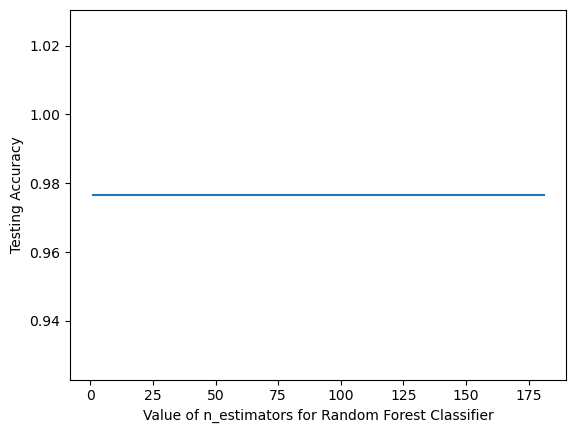

In [7]:
# 5) Plotting The Accuracy Graph (Optional Does Not Effect Actual Prediction)

scores = []

# 5.1) Varying The N_Estimators By 20 from 1 - 201
jump = 20
for k in range(1, 201, jump):
    
    # 5.2) Creating RandomForestClassifer Object With "K" N_Estimators
    transformer2 = RandomForestClassifier(n_estimators = k)
    
    # 5.3) Making A PipeLine
    pipe = Pipeline([('transformer1', transformer1), ('transformer2', transformer2)])
    
    # 5.4) Training The Model
    pipe.fit(X_train, y_train)
    
    # 5.5) Predicting And Storing The Accuracy At Different N_Estimators
    y_pred = pipe.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

# 5.6) Accuracy Graph (X-Axis = N_Estimators, Y-Axis = Accuracy)
plt.plot(range(1, 201, jump), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

# 5.7) Getting The Max Accuracy With Its N_Estimator
maxs = max(scores)
maxs_idx = scores.index(maxs)
print("Accuracy Score : ", maxs, "with n_estimators : ", pow(jump,maxs_idx))

In [8]:
# 6) Creating RandomForestClassifier Object With Default N_Estimators Which Is "100"

transformer2 = RandomForestClassifier()

In [9]:
# 7) Creating The Pipeline With OneHotEncoder And RandomForestClassifier

pipe = Pipeline([('transformer1', transformer1), ('transformer2', transformer2)])

In [10]:
# 8) Training The Model

pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_first_second_venue',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 1, 2])])),
                ('transformer2', RandomForestClassifier())])

In [11]:
# 9) Pipeline Diagram (Optional)

from sklearn import set_config
set_config(display = 'diagram')

In [12]:
# 10) Finding The Current Accuracy With Default N_Estimators Which Is "100"

y_pred = pipe.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9766621438263229


In [13]:
# 11) Making A Sample Prediction To Make Sure

prediction = pd.DataFrame([['Sri Lanka', 'India', 'Shere Bangla National Stadium']], columns = ['Bat First', 'Bat Second', 'Venue'])
winner = pipe.predict(prediction)
print(str(winner[0]))

Sri Lanka


In [15]:
# 12) Creating The GUI

# 12.1) Setting Appearance And Theme To Make GUI Look Appealing
ctk.set_appearance_mode("Dark") 
ctk.set_default_color_theme("blue") 


# 12.2) Creating GUI Class
class App(ctk.CTk):
    
    # 12.3) Making Function Which Is Called When Predict Is Pressed
    def button_event(self):
        teamA = self.teamAOptions.get()
        teamB = self.teamBOptions.get()
        venue = self.venueOptions.get()
        tossWin = self.tossWinOptions.get()
        
        if tossWin == teamA:
            prediction = pd.DataFrame([[teamA, teamB, venue]], columns = ['Bat First', 'Bat Second', 'Venue'])
        elif tossWin == teamB:
            prediction = pd.DataFrame([[teamB, teamA, venue]], columns = ['Bat First', 'Bat Second', 'Venue'])
            
        winner = pipe.predict(prediction)
        
        for i in range(101):
            self.after(1)
            self.progressBar.set(i/100)
            self.progressBar.update()
            
        self.predictionLabel.configure(text = str(winner[0]))
        
    # 12.3) Making Function Which Is Called When DropDown Menu Is Clicked    
    def updateAllDropDown(self, choice):
        teamA = self.teamAOptions.get()
        teamB = self.teamBOptions.get()
        tempTeamsA = teams.copy()
        tempTeamsB = teams.copy()
        tempTeamsA.remove(teamB)
        tempTeamsB.remove(teamA)
        self.teamA.configure(values = tempTeamsA)
        self.teamB.configure(values = tempTeamsB)
        self.tossWin.configure(values = [teamA, teamB])
        self.tossWin.set(teamA)
            
    # 12.4) Making Function Which Is Called When Window Is Closed
    def quit_me(self):
        self.quit()
        self.destroy()
        
    # 12.5) Making Class Constructor
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        # 12.6) Setting Window Title And Size
        self.title("SIX SENSE CRICKET PREDICTIONS")
        self.geometry("1000x500")
        
        
        # 12.7) Making All Components (Labels/DropDown/Button/ProgressBar)
        self.titleLabel = ctk.CTkLabel(self, text = "SIX SENSE CRICKET PREDICTIONS", font = ("Arial", 40, "bold", "underline"), text_color = "White")
        self.titleLabel.place(relx = 0.5, rely = 0.1, anchor = ctk.N)
        
        self.teamALabel = ctk.CTkLabel(self, width = 150, text = "First Team : ", text_color = "White", font = ("Arial", 20))
        self.teamALabel.place(x = 100, rely = 0.3)
            
        self.teamAOptions = ctk.StringVar()
        self.teamA = ctk.CTkOptionMenu(self, variable = self.teamAOptions, width = 150, values = teams, font = ("Arial", 20), command = self.updateAllDropDown)
        self.teamA.place(x = 250, rely = 0.3)
        self.teamAOptions.set(teams[0])
        
        self.teamBLabel = ctk.CTkLabel(self, width = 150, text = "Second Team : ", text_color = "White", font = ("Arial", 20))
        self.teamBLabel.place(x = 600, rely = 0.3)
        
        self.teamBOptions = ctk.StringVar()
        self.teamB = ctk.CTkOptionMenu(self, variable = self.teamBOptions, width = 150, values = teams, font = ("Arial", 20), command = self.updateAllDropDown)
        self.teamB.place(x = 750, rely = 0.3)
        self.teamBOptions.set(teams[1])
        
        self.venueLabel = ctk.CTkLabel(self, width = 150, text = "Venue : ", text_color = "White", font = ("Arial", 20))
        self.venueLabel.place(x = 175, rely = 0.4)
        
        self.venueOptions = ctk.StringVar()
        self.venue = ctk.CTkOptionMenu(self, variable = self.venueOptions, width = 150, values = df['Venue'].unique(), font = ("Arial", 20))
        self.venue.place(x = 325, rely = 0.4)
        self.venueOptions.set(df['Venue'].unique()[0])
        
        self.tossWinLabel = ctk.CTkLabel(self, width = 150, text = "Toss : ", text_color = "White", font = ("Arial", 20))
        self.tossWinLabel.place(x = 525, rely = 0.4)
        
        self.tossWinOptions = ctk.StringVar()
        self.tossWin = ctk.CTkOptionMenu(self, variable = self.tossWinOptions, width = 150, values = teams, font = ("Arial", 20))
        self.tossWin.place(x = 675, rely = 0.4)
        self.tossWinOptions.set(self.teamAOptions.get())
        
        
        self.predictButton = ctk.CTkButton(self, width = 250, text = "Predict", command = self.button_event, font = ("Arial", 30))
        self.predictButton.place(x = 375, rely = 0.5)
        
        self.progressBar = ctk.CTkProgressBar(self, width = 800, mode = "determinate")
        self.progressBar.place(x = 100, rely = 0.7)
        self.progressBar.set(0)
        
        self.outcomeLabel = ctk.CTkLabel(self, width = 600, text = "The Team Which Is More Likely To Win Is : ", text_color = "White", font = ("Arial", 30))
        self.outcomeLabel.place(x = 125, rely = 0.8)
        
        self.predictionLabel = ctk.CTkLabel(self, width = 150, text = "", text_color = "White", font = ("Arial", 30))
        self.predictionLabel.place(x = 725, rely = 0.8)
        self.updateAllDropDown("HACK")
        
# 12.8) Running The App (GUI)
if __name__ == "__main__":
    app = App()
    app.protocol("WM_DELETE_WINDOW", app.quit_me)
    app.mainloop()